In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mytorch.nn.activation import ReLU, Softmax, Tanh, LinearActivation
from mytorch.nn.initialization import Xavier, He
from mytorch.nn.linear import Linear
from mytorch.nn.loss import CrossEntropyLoss, L2Loss
from mytorch.optim.optimizer import SGD, Adam
from models.mlp import MLP
import numpyNN

In [2]:
# based on dataset.py from IML HW 6 
def one_hot_encoding(y, num_classes=2):
    one_hot = np.eye(num_classes)[y.astype(int).flatten()]
    return one_hot

In [3]:
def train_mlp(mlp, x_train, y_train, opt_loss, opt_optim, num_epoch = 20):
    
    print(x_train.shape, y_train.shape)
    assert(x_train.shape[0]== y_train.shape[0]) # "x_train and y_train must have same length"
    
    
    index = np.arange(len(x_train))
    train_loss = []
    train_accuracy = [ ]
    opt_optim.initialize(mlp.get_parameters() )

    y_train = one_hot_encoding(y_train)


    for epoch in range(num_epoch):
        np.random.shuffle(index)
        train_data = x_train[index]
        train_label = y_train[index]
        
        y_pred = mlp.forward(train_data)
        
        loss = opt_loss.forward(y_pred, train_label)
        loss = np.mean(loss)
        train_loss.append(loss)

        predicted_labels = np.argmax(y_pred, axis=1)
        true_labels = np.argmax(train_label, axis=1)
        
        accuracy = np.sum(predicted_labels == true_labels) / len(train_data)
        train_accuracy.append(accuracy)
        print(accuracy)
        
        dLdZ = opt_loss.backward(y_pred, train_label)
        mlp.backward(dLdZ)
        opt_optim.step()
        opt_optim.zero_grad()
        
        print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy}")
    
    train_logs = {"train_loss": train_loss, "train_accuracy": train_accuracy}
    return train_logs

In [4]:
def test_mlp(mlp, x_test, y_test, opt_loss, num_epoch = 20):
    """
    Parameters
    ----------
    Returns
    -------
        [0] Mean test loss.
        [1] Test accuracy.
    """
    assert(x_test.shape[0] == y_test.shape[0]) # "x_test and y_test must have same length"
    
    test_loss = []
    test_accuracy = [ ]
    y_test = one_hot_encoding(y_test)

    for epoch in range(num_epoch):
        y_pred = mlp.forward(x_test)
        loss = opt_loss.forward(y_pred, y_test) 
        loss = np.mean(loss)
        test_loss.append(loss)
        
        predicted_labels = np.argmax(y_pred, axis=1)
        true_labels = np.argmax(y_test, axis=1) 
        
        accuracy = np.sum(predicted_labels == true_labels) / len(x_test)
        test_accuracy.append(accuracy)  
        print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy}")
    
    test_logs = {"test_loss": test_loss, "test_accuracy": test_accuracy }
    return test_logs

In [5]:
x_train, y_train, x_test, y_test = numpyNN.sample_data(data_name = 'linear-separable',nTrain=100, nTest=40)

In [6]:
dim_in, dim_out = x_train.shape[1], 2
hidden_neuron_list = [4,8,16]
activation_list = ['ReLU', 'ReLU', 'ReLU', 'Softmax']
opt_init = None
opt_loss = L2Loss()
mlp = MLP(dim_in, dim_out, hidden_neuron_list, activation_list, opt_init)
opt_optim = SGD(lr_decay=1, decay_iter=30)
opt_optim.initialize(mlp.get_parameters() )

In [7]:
train_logs = train_mlp(mlp, x_train, y_train, opt_loss, opt_optim, num_epoch = 20)

(100, 2) (100, 1)
0.54
0 Initialized v
Epoch: 0, Loss: 0.0066816213985553975, Accuracy: 0.54
0.54
Epoch: 1, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 2, Loss: 0.0066816213985553975, Accuracy: 0.54
0.54
Epoch: 3, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 4, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 5, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 6, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 7, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 8, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 9, Loss: 0.0066816213985553975, Accuracy: 0.54
0.54
Epoch: 10, Loss: 0.006681621398555395, Accuracy: 0.54
0.54
Epoch: 11, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 12, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 13, Loss: 0.0066816213985553975, Accuracy: 0.54
0.54
Epoch: 14, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 15, Loss: 0.006681621398555397, Accuracy: 0.54
0.54
Epoch: 16, Loss: 0.0066

In [8]:
train_logs

{'train_loss': [0.0066816213985553975,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555397,
  0.006681621398555397,
  0.006681621398555397,
  0.006681621398555397,
  0.006681621398555397,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555395,
  0.006681621398555397,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555397,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555397],
 'train_accuracy': [0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54]}

In [9]:
mlp_test = mlp
test_logs = test_mlp(mlp_test, x_test, y_test, opt_loss, num_epoch = 20)

Epoch: 0, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 1, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 2, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 3, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 4, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 5, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 6, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 7, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 8, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 9, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 10, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 11, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 12, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 13, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 14, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 15, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 16, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 17, Loss: 0.01977506399951261, Accuracy: 0.475
Epoch: 18, Loss: 0.01977506399951261, 

In [10]:
y_test

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [11]:
test_logs

{'test_loss': [0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261],
 'test_accuracy': [0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475,
  0.475]}

In [12]:
logs = {**train_logs, **test_logs}
logs

{'train_loss': [0.0066816213985553975,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555397,
  0.006681621398555397,
  0.006681621398555397,
  0.006681621398555397,
  0.006681621398555397,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555395,
  0.006681621398555397,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555397,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555397,
  0.0066816213985553975,
  0.006681621398555397],
 'train_accuracy': [0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54,
  0.54],
 'test_loss': [0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.01977506399951261,
  0.0197

In [13]:
print(logs)

{'train_loss': [0.0066816213985553975, 0.006681621398555397, 0.0066816213985553975, 0.006681621398555397, 0.006681621398555397, 0.006681621398555397, 0.006681621398555397, 0.006681621398555397, 0.006681621398555397, 0.0066816213985553975, 0.006681621398555395, 0.006681621398555397, 0.006681621398555397, 0.0066816213985553975, 0.006681621398555397, 0.006681621398555397, 0.0066816213985553975, 0.006681621398555397, 0.0066816213985553975, 0.006681621398555397], 'train_accuracy': [0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54], 'test_loss': [0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.01977506399951261, 0.019

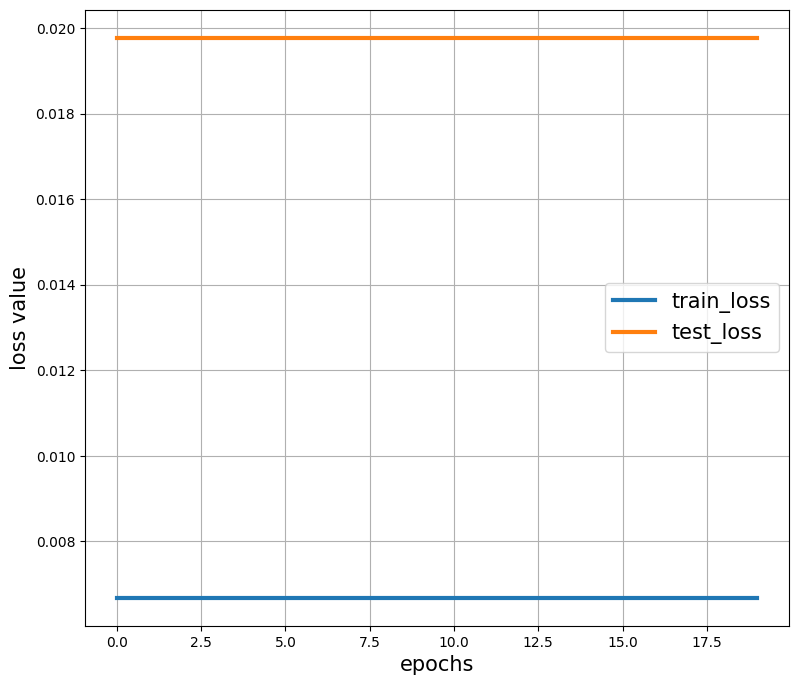

In [14]:
numpyNN.plot_loss(logs)

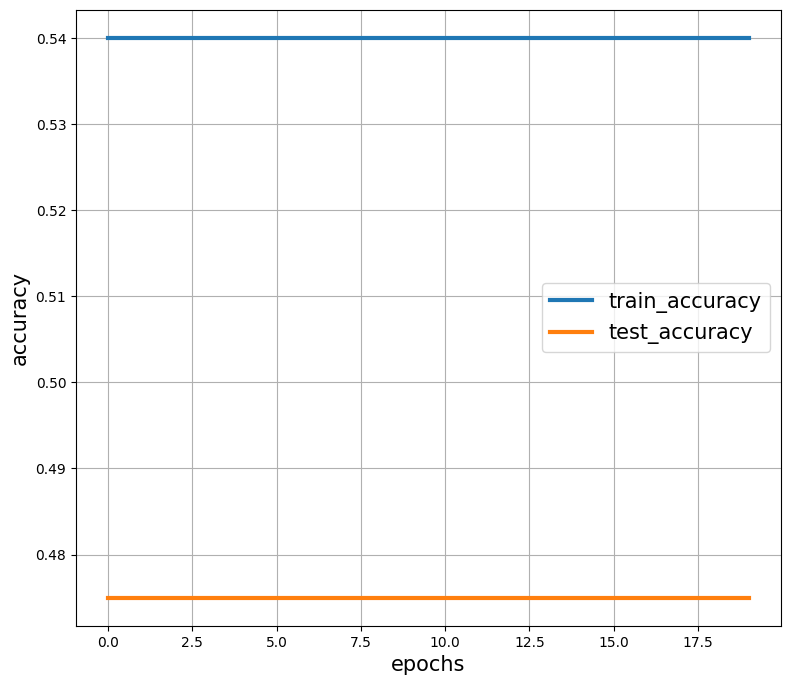

In [15]:
numpyNN.plot_accuracy(logs)

In [16]:

print(mlp.summary())

Model Summary
-------------
Layer 1: Linear - Input Dim: 2, Output Dim: 4, Parameters: 12
Layer 2: ReLU
Layer 3: Linear - Input Dim: 4, Output Dim: 8, Parameters: 40
Layer 4: ReLU
Layer 5: Linear - Input Dim: 8, Output Dim: 16, Parameters: 144
Layer 6: ReLU
Layer 7: Linear - Input Dim: 16, Output Dim: 2, Parameters: 34
Layer 8: Softmax
Total Parameters: 230
None


In [17]:
print(mlp.get_parameters())


[{'params': array([[-0.05293378,  0.33300574, -0.64898176, -1.54305643],
       [ 1.65946033, -0.97009222,  1.29233496, -0.93876191]]), 'grad': array([[25.1874204 ,  2.64170358,  0.        ,  0.        ],
       [ 7.52712957, -0.35091345,  0.        ,  0.        ]])}, {'params': array([[0., 0., 0., 0.]]), 'grad': array([[ 53, 100,   0,   0]])}, {'params': array([[-1.2125329 ,  1.67364748,  1.97539178, -1.17701205,  1.28612871,
         0.87177349, -0.98595996,  0.09345946],
       [-1.61964135, -1.62542609, -0.5144455 ,  0.31278707,  1.5645126 ,
         0.8184355 ,  0.40214982,  0.11805556],
       [ 0.03544277, -0.4779011 ,  0.62369317, -2.46952308, -1.14912376,
        -0.50097079,  0.01475948, -0.39105058],
       [-0.38841958,  1.05014196, -0.03206939, -0.04773387, -0.27734295,
        -0.47213627, -0.18532964,  0.19542023]]), 'grad': array([[ 0.        ,  0.        ,  0.        , 12.92249045,  0.10503757,
        41.76161291, 12.92249045,  0.        ],
       [ 0.        ,  0.   

In [18]:

y_pred = mlp.forward(x_train)
y_train = one_hot_encoding(y_train)
loss = opt_loss.forward(y_pred, y_train)

In [19]:
y_pred[1:4], y_train[1:4], loss[1:4]

(array([[0.49039975, 0.50960025],
        [0.41718584, 0.58281416],
        [0.99802557, 0.00197443]]),
 array([[0., 1.],
        [1., 0.],
        [1., 0.]]),
 array([4.80983838e-03, 6.79344684e-03, 7.79672265e-08]))

In [20]:
predicted_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_train, axis=1)  # Adjust this line if train_y is not one-hot encoded
accuracy = np.sum(predicted_labels == true_labels) / len(x_train)
print(accuracy)

0.54


In [21]:
print("Before backward:", mlp.layers[0].parameters[0]['params'].mean())

Before backward: -0.10862813388920195


In [22]:
dLdZ = opt_loss.backward(y_pred, y_train)
dLdZ[1:10]

array([[ 9.80799509e-03, -9.80799509e-03],
       [-1.16562832e-02,  1.16562832e-02],
       [-3.94885367e-05,  3.94885367e-05],
       [-2.87380117e-06,  2.87380117e-06],
       [ 1.99985947e-02, -1.99985947e-02],
       [ 1.88711909e-02, -1.88711909e-02],
       [-1.45053405e-05,  1.45053405e-05],
       [-1.19211140e-02,  1.19211140e-02],
       [ 1.99440597e-02, -1.99440597e-02]])

In [23]:
dLdZ.shape

(100, 2)

In [24]:
mlp.get_parameters()

[{'params': array([[-0.05293378,  0.33300574, -0.64898176, -1.54305643],
         [ 1.65946033, -0.97009222,  1.29233496, -0.93876191]]),
  'grad': array([[25.1874204 ,  2.64170358,  0.        ,  0.        ],
         [ 7.52712957, -0.35091345,  0.        ,  0.        ]])},
 {'params': array([[0., 0., 0., 0.]]), 'grad': array([[ 53, 100,   0,   0]])},
 {'params': array([[-1.2125329 ,  1.67364748,  1.97539178, -1.17701205,  1.28612871,
           0.87177349, -0.98595996,  0.09345946],
         [-1.61964135, -1.62542609, -0.5144455 ,  0.31278707,  1.5645126 ,
           0.8184355 ,  0.40214982,  0.11805556],
         [ 0.03544277, -0.4779011 ,  0.62369317, -2.46952308, -1.14912376,
          -0.50097079,  0.01475948, -0.39105058],
         [-0.38841958,  1.05014196, -0.03206939, -0.04773387, -0.27734295,
          -0.47213627, -0.18532964,  0.19542023]]),
  'grad': array([[ 0.        ,  0.        ,  0.        , 12.92249045,  0.10503757,
          41.76161291, 12.92249045,  0.        ],
 

In [25]:
mlp.backward(dLdZ)

array([[ 0.33300574, -0.97009222],
       [ 0.33300574, -0.97009222],
       [ 0.28007196,  0.68936811],
       [ 0.28007196,  0.68936811],
       [ 0.28007196,  0.68936811],
       [ 0.33300574, -0.97009222],
       [ 0.33300574, -0.97009222],
       [ 0.28007196,  0.68936811],
       [ 0.28007196,  0.68936811],
       [ 0.33300574, -0.97009222],
       [ 0.33300574, -0.97009222],
       [ 0.33300574, -0.97009222],
       [ 0.28007196,  0.68936811],
       [ 0.33300574, -0.97009222],
       [ 0.33300574, -0.97009222],
       [ 0.28007196,  0.68936811],
       [ 0.33300574, -0.97009222],
       [ 0.33300574, -0.97009222],
       [ 0.33300574, -0.97009222],
       [ 0.28007196,  0.68936811],
       [ 0.33300574, -0.97009222],
       [ 0.28007196,  0.68936811],
       [ 0.28007196,  0.68936811],
       [ 0.28007196,  0.68936811],
       [ 0.28007196,  0.68936811],
       [ 0.33300574, -0.97009222],
       [ 0.28007196,  0.68936811],
       [ 0.28007196,  0.68936811],
       [ 0.28007196,

In [26]:
mlp.get_parameters()

[{'params': array([[-0.05293378,  0.33300574, -0.64898176, -1.54305643],
         [ 1.65946033, -0.97009222,  1.29233496, -0.93876191]]),
  'grad': array([[25.1874204 ,  2.64170358,  0.        ,  0.        ],
         [ 7.52712957, -0.35091345,  0.        ,  0.        ]])},
 {'params': array([[0., 0., 0., 0.]]), 'grad': array([[ 53, 100,   0,   0]])},
 {'params': array([[-1.2125329 ,  1.67364748,  1.97539178, -1.17701205,  1.28612871,
           0.87177349, -0.98595996,  0.09345946],
         [-1.61964135, -1.62542609, -0.5144455 ,  0.31278707,  1.5645126 ,
           0.8184355 ,  0.40214982,  0.11805556],
         [ 0.03544277, -0.4779011 ,  0.62369317, -2.46952308, -1.14912376,
          -0.50097079,  0.01475948, -0.39105058],
         [-0.38841958,  1.05014196, -0.03206939, -0.04773387, -0.27734295,
          -0.47213627, -0.18532964,  0.19542023]]),
  'grad': array([[ 0.        ,  0.        ,  0.        , 12.92249045,  0.10503757,
          41.76161291, 12.92249045,  0.        ],
 

In [27]:
print("Before optimization:", mlp.layers[0].parameters[0]['params'].mean())

Before optimization: -0.10862813388920195


In [28]:
opt_optim.step()

In [29]:
print("After optimization:", mlp.layers[0].parameters[0]['params'].mean())

After optimization: -0.10862813388920195


In [30]:
opt_optim.zero_grad()

In [31]:
mlp.get_parameters()

[{'params': array([[-0.05293378,  0.33300574, -0.64898176, -1.54305643],
         [ 1.65946033, -0.97009222,  1.29233496, -0.93876191]]),
  'grad': array([[25.1874204 ,  2.64170358,  0.        ,  0.        ],
         [ 7.52712957, -0.35091345,  0.        ,  0.        ]])},
 {'params': array([[0., 0., 0., 0.]]), 'grad': array([[ 53, 100,   0,   0]])},
 {'params': array([[-1.2125329 ,  1.67364748,  1.97539178, -1.17701205,  1.28612871,
           0.87177349, -0.98595996,  0.09345946],
         [-1.61964135, -1.62542609, -0.5144455 ,  0.31278707,  1.5645126 ,
           0.8184355 ,  0.40214982,  0.11805556],
         [ 0.03544277, -0.4779011 ,  0.62369317, -2.46952308, -1.14912376,
          -0.50097079,  0.01475948, -0.39105058],
         [-0.38841958,  1.05014196, -0.03206939, -0.04773387, -0.27734295,
          -0.47213627, -0.18532964,  0.19542023]]),
  'grad': array([[ 0.        ,  0.        ,  0.        , 12.92249045,  0.10503757,
          41.76161291, 12.92249045,  0.        ],
 